In [1]:
#import dependencies
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import sqlite3
from sqlite3 import Error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
plt.style.use('fivethirtyeight')

In [2]:
# Define the Bitcoin ticker symbol and the date range
ticker = "BTC-USD"
start_date = "2020-01-01"

# Fetch historical data
bitcoin_data = yf.download(ticker, start=start_date)

# Dataframe preview
print(bitcoin_data.head())

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-01  7194.892090  7254.330566  7174.944336  7200.174316  7200.174316   
2020-01-02  7202.551270  7212.155273  6935.270020  6985.470215  6985.470215   
2020-01-03  6984.428711  7413.715332  6914.996094  7344.884277  7344.884277   
2020-01-04  7345.375488  7427.385742  7309.514160  7410.656738  7410.656738   
2020-01-05  7410.451660  7544.497070  7400.535645  7411.317383  7411.317383   

                 Volume  
Date                     
2020-01-01  18565664997  
2020-01-02  20802083465  
2020-01-03  28111481032  
2020-01-04  18444271275  
2020-01-05  19725074095  


In [3]:
bitcoin_data.shape

(1192, 6)

In [4]:
bitcoin_data['Close']

Date
2020-01-01     7200.174316
2020-01-02     6985.470215
2020-01-03     7344.884277
2020-01-04     7410.656738
2020-01-05     7411.317383
                  ...     
2023-04-02    28199.308594
2023-04-03    27790.220703
2023-04-04    28168.089844
2023-04-05    28177.984375
2023-04-07    28064.146484
Name: Close, Length: 1192, dtype: float64

In [5]:
# Function to create a connection to the SQLite database
def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)
    return conn

# Function to create a table in the SQLite database
def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

# Create a connection to the SQLite database
database = "bitcoin_data.db"
conn = create_connection(database)

# Create the Bitcoin price table if it doesn't exist
if conn is not None:
    sql_create_bitcoin_table =  """
    CREATE TABLE IF NOT EXISTS bitcoin_price (  
        Date DATE PRIMARY KEY,
        Open REAL,
        High REAL,
        Low REAL,
        Close REAL,
        Adj_Close REAL,
        Volume INTEGER);
    """
    create_table(conn, sql_create_bitcoin_table)
else:
    print("Error! Cannot create the database connection.")

# Insert the historical data into the SQLite database
bitcoin_data.to_sql("bitcoin_price", conn, if_exists="replace", index=True)

# Commit the changes and close the connection
conn.commit()
conn.close()

In [6]:
# Create a connection to the SQLite database
database = "bitcoin_data.db"
conn = create_connection(database)

# Check if the connection is successful
if conn is not None:
    # Read the data from the SQLite database into a Pandas DataFrame
    bitcoin_data_df = pd.read_sql_query("SELECT * FROM bitcoin_price", conn)

    # Close the connection to the SQLite database
    conn.close()

    # Display the first few rows of the DataFrame
    print(bitcoin_data_df.head())
else:
    print("Error! Cannot create the database connection.")

                  Date         Open         High          Low        Close  \
0  2020-01-01 00:00:00  7194.892090  7254.330566  7174.944336  7200.174316   
1  2020-01-02 00:00:00  7202.551270  7212.155273  6935.270020  6985.470215   
2  2020-01-03 00:00:00  6984.428711  7413.715332  6914.996094  7344.884277   
3  2020-01-04 00:00:00  7345.375488  7427.385742  7309.514160  7410.656738   
4  2020-01-05 00:00:00  7410.451660  7544.497070  7400.535645  7411.317383   

     Adj Close       Volume  
0  7200.174316  18565664997  
1  6985.470215  20802083465  
2  7344.884277  28111481032  
3  7410.656738  18444271275  
4  7411.317383  19725074095  


In [7]:
bitcoin_data_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01 00:00:00,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02 00:00:00,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03 00:00:00,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04 00:00:00,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05 00:00:00,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
...,...,...,...,...,...,...,...
1187,2023-04-02 00:00:00,28462.845703,28518.958984,27884.087891,28199.308594,28199.308594,12284641999
1188,2023-04-03 00:00:00,28183.080078,28475.623047,27276.720703,27790.220703,27790.220703,19556501327
1189,2023-04-04 00:00:00,27795.273438,28433.742188,27681.304688,28168.089844,28168.089844,15284538859
1190,2023-04-05 00:00:00,28169.726562,28739.238281,27843.763672,28177.984375,28177.984375,17052315986


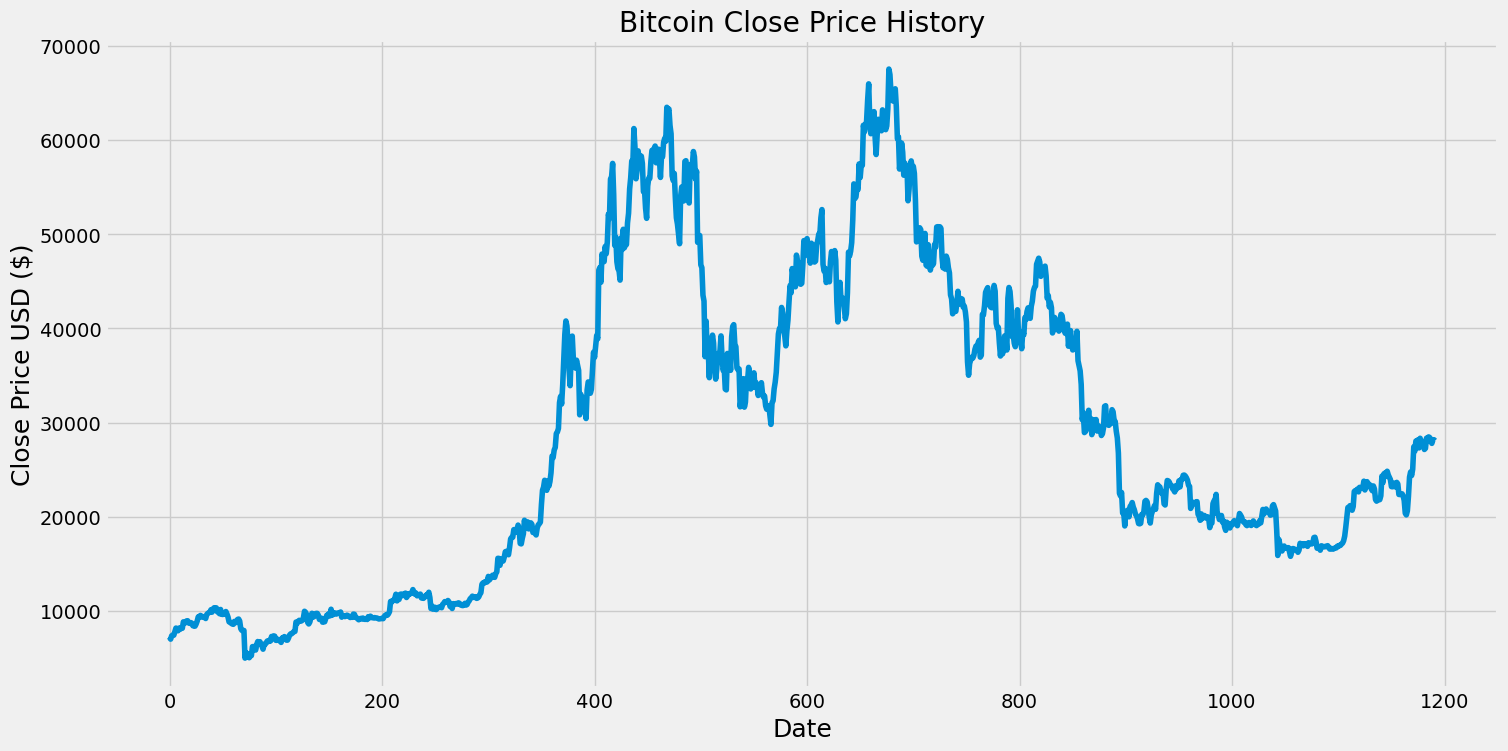

In [8]:
plt.figure(figsize=(16,8))
plt.title('Bitcoin Close Price History')
plt.plot(bitcoin_data_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [9]:
# Create a features function
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(bitcoin_data_df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [10]:
# Define the window size
window_size = 30

# Set the index of the feature and target columns
feature_column = 1
target_column = 1

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(bitcoin_data_df, window_size, feature_column, target_column)

# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[7194.89208984 7202.55126953 6984.42871094 7345.37548828 7410.45166016
  7410.45214844 7768.68212891 8161.93554688 8082.29589844 7878.30761719
  8162.19091797 8033.26171875 8189.77197266 8140.93310547 8825.34375
  8812.48144531 8725.20996094 8927.21191406 8941.4453125  8704.63183594
  8658.99121094 8744.2109375  8680.65039062 8405.56738281 8440.11914062
  8364.41015625 8597.30859375 8912.52441406 9357.47070312 9316.01660156]
 [7202.55126953 6984.42871094 7345.37548828 7410.45166016 7410.45214844
  7768.68212891 8161.93554688 8082.29589844 7878.30761719 8162.19091797
  8033.26171875 8189.77197266 8140.93310547 8825.34375    8812.48144531
  8725.20996094 8927.21191406 8941.4453125  8704.63183594 8658.99121094
  8744.2109375  8680.65039062 8405.56738281 8440.11914062 8364.41015625
  8597.30859375 8912.52441406 9357.47070312 9316.01660156 9508.31347656]
 [6984.42871094 7345.37548828 7410.45166016 7410.45214844 7768.68212891
  8161.93554688 8082.29589844 7878.30761719 8162

In [11]:
# Splitting the data into training and testing sets
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [12]:
X_train.shape

(813, 30)

In [13]:
# Create a MinMaxScaler object and fit 
scaler = MinMaxScaler()
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.03505058]
  [0.03517303]
  [0.0316857 ]
  [0.0374565 ]
  [0.03849693]
  [0.03849694]
  [0.0442243 ]
  [0.05051161]
  [0.04923833]
  [0.04597698]
  [0.05051569]
  [0.04845438]
  [0.05095665]
  [0.05017582]
  [0.06111814]
  [0.06091249]
  [0.0595172 ]
  [0.0627468 ]
  [0.06297436]
  [0.0591882 ]
  [0.0584585 ]
  [0.05982099]
  [0.05880479]
  [0.05440678]
  [0.05495919]
  [0.05374876]
  [0.05747232]
  [0.06251198]
  [0.06962575]
  [0.06896298]]

 [[0.03517303]
  [0.0316857 ]
  [0.0374565 ]
  [0.03849693]
  [0.03849694]
  [0.0442243 ]
  [0.05051161]
  [0.04923833]
  [0.04597698]
  [0.05051569]
  [0.04845438]
  [0.05095665]
  [0.05017582]
  [0.06111814]
  [0.06091249]
  [0.0595172 ]
  [0.0627468 ]
  [0.06297436]
  [0.0591882 ]
  [0.0584585 ]
  [0.05982099]
  [0.05880479]
  [0.05440678]
  [0.05495919]
  [0.05374876]
  [0.05747232]
  [0.06251198]
  [0.06962575]
  [0.06896298]
  [0.07203741]]

 [[0.0316857 ]
  [0.0374565 ]
  [0.03849693]
  [0.03849694]
  [0.0442243 

In [14]:
# Build the LSTM model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Could try adding Dense layers here (model.add(Dense(30))

# Output layer
model.add(Dense(1))

In [15]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Show the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 30)            3840      
                                                                 
 dropout (Dropout)           (None, 30, 30)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 30)            7320      
                                                                 
 dropout_1 (Dropout)         (None, 30, 30)            0         
                                                                 
 lstm_2 (LSTM)               (None, 30)                7320      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [16]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=90, verbose=1)

Epoch 1/10
10/10 [==============================] - 3s 18ms/step - loss: 0.1009
Epoch 2/10
10/10 [==============================] - 0s 17ms/step - loss: 0.0502
Epoch 3/10
10/10 [==============================] - 0s 17ms/step - loss: 0.0463
Epoch 4/10
10/10 [==============================] - 0s 17ms/step - loss: 0.0129
Epoch 5/10
10/10 [==============================] - 0s 18ms/step - loss: 0.0157
Epoch 6/10
10/10 [==============================] - 0s 18ms/step - loss: 0.0165
Epoch 7/10
10/10 [==============================] - 0s 18ms/step - loss: 0.0110
Epoch 8/10
10/10 [==============================] - 0s 17ms/step - loss: 0.0146
Epoch 9/10
10/10 [==============================] - 0s 18ms/step - loss: 0.0102
Epoch 10/10
10/10 [==============================] - 0s 17ms/step - loss: 0.0125


In [17]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.0023409368004649878

In [18]:
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

11/11 [==============================] - 1s 5ms/step


In [19]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [20]:
# Create a DataFrame of Real and Predicted values
bitcoin_df = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = bitcoin_data_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
bitcoin_df.head()

,Actual,Predicted
843,39738.722656,42457.328125
844,39478.375000,42250.664062
845,39472.605469,42049.351562
846,40448.421875,41854.867188
847,38120.300781,41671.457031


<AxesSubplot:title={'center':'Actual Vs. Predicted Bitcoin Prices'}>

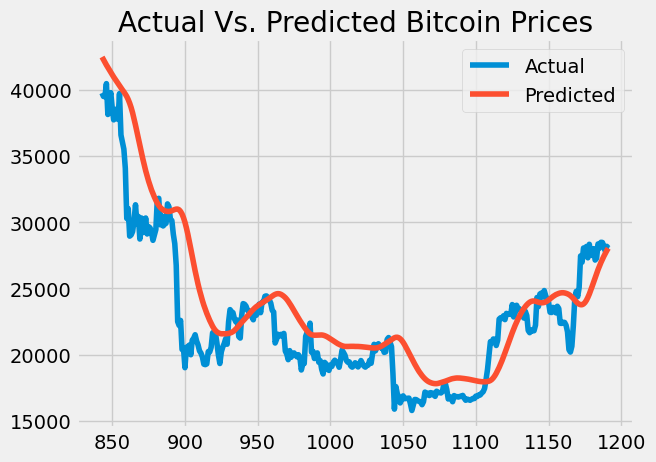

In [21]:
# Plot the real vs predicted prices as a line chart
bitcoin_df.plot(title="Actual Vs. Predicted Bitcoin Prices")